In [261]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('enterprise_ai_adoption_internet_events.csv')
df.head()

,ticker,company_name,industry,use_case,agent_type,agent_use_case,ai_vendor,ai_model,annoucement_date,source_url,sp_index
0,ABT,Abbott Laboratories,Healthcare,In-app generative AI that predicts a meal's li...,Customer & Revenue Agents,People living with diabetes interact via the L...,NaN,NaN,2026-01-05,https://abbott.mediaroom.com/2026-01-05-Abbott...,500
1,APA,APA Corporation,Energy and resources,Use of Palantir's Artificial Intelligence Plat...,Data & Analytics Agents,"Operations, supply chain, maintenance, and fin...",Palantir Technologies,NaN,2024-09-25,https://www.businesswire.com/news/home/2024092...,500
2,AOS,A. O. Smith Corporation,Manufacturing,Company has begun a digital transformation to ...,Automation & Platform Agents,A newly appointed Chief Digital Information Of...,NaN,NaN,2025-10-03,https://investor.aosmith.com/news-releases/new...,500
3,AES,The AES Corporation,Energy and resources,AI-enabled robotic installation of solar modul...,Automation & Platform Agents,Construction crews and AES operations engineer...,NaN,NaN,2024-07-30,https://www.aes.com/newsroom/aes-launches-firs...,500
4,AES,The AES Corporation,Energy and resources,Generative-AI driven analytics to predict how ...,Data & Analytics Agents,Internal renewables development and portfolio ...,AI Fund (co-build partnership),NaN,2024-08-06,https://thetranscript.net/transcript/6648/aes-...,500


In [262]:
df['industry'] = df['industry'].astype(str)
filtered_industry_df = df[df["industry"].str.contains("Healthcare", na=False)]

In [263]:
filtered_industry_df['sp_index'] = filtered_industry_df['sp_index'].astype(str)
filtered_sp500_df = filtered_industry_df[filtered_industry_df["sp_index"].str.contains("500", na=False)]

C:\Users\katie\AppData\Local\Temp\ipykernel_3772\628792260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_industry_df['sp_index'] = filtered_industry_df['sp_index'].astype(str)


In [264]:
filtered_sp500_df["company_name"].value_counts()

company_name
Hologic, Inc.                         3
Elevance Health                       3
UnitedHealth Group                    3
Danaher Corporation                   3
Solventum                             3
Medtronic plc                         2
IDEXX Laboratories, Inc.              2
Align Technology, Inc.                2
Henry Schein, Inc.                    2
Quest Diagnostics Incorporated        2
ResMed Inc.                           2
GE HealthCare                         2
Edwards Lifesciences Corporation      2
Johnson & Johnson                     2
McKesson Corporation                  2
Stryker Corporation                   2
Cardinal Health                       2
Universal Health Services, Inc.       2
Centene Corporation                   2
CVS Health                            2
Becton, Dickinson and Company         2
Boston Scientific Corporation         2
Pfizer Inc.                           1
Merck & Co., Inc.                     1
Zimmer Biomet Holdings, Inc

In [288]:
counts = filtered_sp500_df["agent_type"].value_counts()
categories = counts.index
values = counts.values

print(counts)

agent_type
Workforce & Back Office Agents        19
Customer & Revenue Agents             17
Data & Analytics Agents               14
Knowledge & Reasoning Agents           9
Automation & Platform Agents           4
Creative & Media Agents                2
Engineering & IT Agents                1
Security, Risk & Governance Agents     1
Name: count, dtype: int64


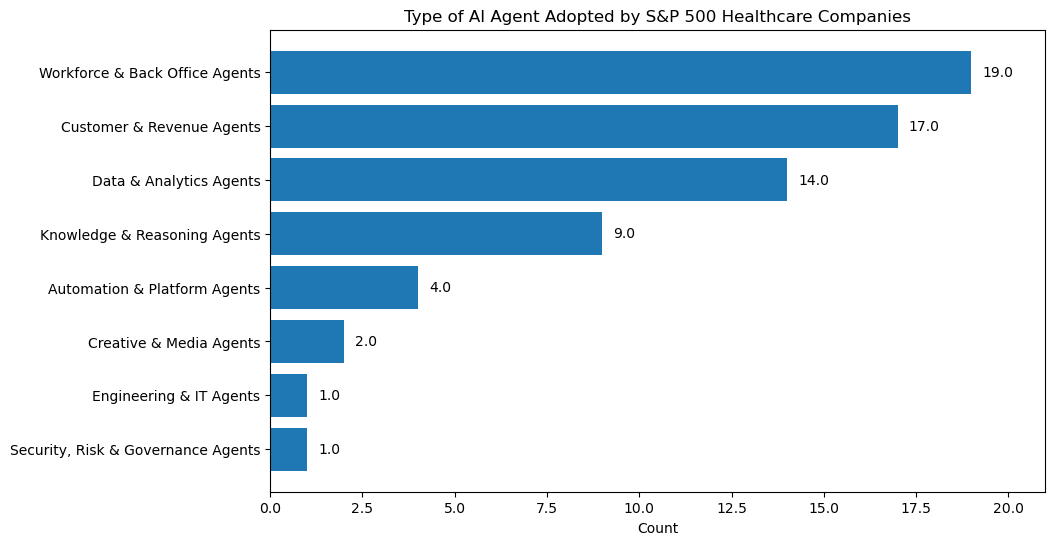

In [289]:
fig, ax = plt.subplots(figsize=(10, 6)) # Width=10 inches, Height=6 inches

# 2. Create the horizontal bar chart
hbars = ax.barh(categories, values, align='center')

# Invert the y-axis so the first label is at the top
ax.invert_yaxis() 

# 3. Add data labels using ax.bar_label()
ax.bar_label(hbars, padding=8, fmt='%.1f') # Add padding to move labels away from the bar edge

# 4. Set labels and title
ax.set_xlabel('Count')
ax.set_title('Type of AI Agent Adopted by S&P 500 Healthcare Companies')

# 5. Adjust x-axis limits to ensure labels fit (optional, but recommended)
# You can set the right limit higher than the max value (e.g., max(values) + some_padding)
ax.set_xlim(right=max(values)+2) 

plt.show()

In [267]:
filtered_sp500_df['agent_type'] = filtered_sp500_df['agent_type'].astype(str)
workforce_df = filtered_sp500_df[filtered_sp500_df["agent_type"].str.contains("Workforce & Back Office Agents", na=False)]
#workforce_df.to_csv("workforce.csv")
workforce_df["company_name"].value_counts()

C:\Users\katie\AppData\Local\Temp\ipykernel_3772\2867769386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sp500_df['agent_type'] = filtered_sp500_df['agent_type'].astype(str)


company_name
Elevance Health                     2
3M Health Information Systems       1
Henry Schein, Inc.                  1
Stryker Corporation                 1
Solventum                           1
Revvity, Inc.                       1
Medtronic plc                       1
McKesson Corporation                1
Johnson & Johnson                   1
HCA Healthcare, Inc.                1
Baxter International Inc.           1
GE HealthCare                       1
Edwards Lifesciences Corporation    1
The Cooper Companies, Inc.          1
Cardinal Health                     1
Centene Corporation                 1
CVS Health                          1
UnitedHealth Group                  1
Name: count, dtype: int64

In [268]:
oc_df = pd.read_csv('operating_costs.csv')


In [269]:
output_file = 'finance_joined.csv'
join_column_name = 'ticker' 

try:
    merged_df = pd.merge(workforce_df, oc_df, on=join_column_name, how='inner')
    merged_df.to_csv(output_file)
except FileNotFoundError as e:
    print(e)
except Exception as e:
    print(f"An error occurred: {e}")


In [270]:
import matplotlib.pyplot as plt

In [271]:
weights_df = pd.read_csv('sp500_healthcare_companies.csv')

In [272]:
output_file = 'weights_joined.csv'
join_column_name = 'ticker' 

try:
    merged_df = pd.merge(merged_df, weights_df, on=join_column_name, how='inner')
    merged_df.to_csv(output_file)
except FileNotFoundError as e:
    print(e)
except Exception as e:
    print(f"An error occurred: {e}")

In [273]:
merged_df['weight'] = merged_df['weight'].astype(str)
merged_df['weight'] = merged_df['weight'].str.rstrip('%').astype('float')
merged_df['weight'] = merged_df['weight'] / 100.0
merged_df.head()

,ticker,company_name,industry_x,use_case,agent_type,agent_use_case,ai_vendor,ai_model,annoucement_date,source_url,sp_index,cost_before,cost_after,rank,company,weight,industry_y
0,BAX,Baxter International Inc.,Healthcare,Resell and integrate Pieces Technologies' gene...,Workforce & Back Office Agents,Clinicians and case-management teams interact ...,Pieces Technologies,NaN,2025-06-03,https://www.prnewswire.com/news-releases/baxte...,500,849,818,477,Baxter International,0.0002,Health Care Equipment & Supplies
1,CVS,CVS Health,Healthcare,Internal generative AI to summarize clinical e...,Workforce & Back Office Agents,Clinicians in Signify and Oak Street clinics a...,NaN,NaN,2023-12-04,https://www.fiercehealthcare.com/providers/cvs...,500,7401,4409,113,CVS Health,0.0016,Health Care Providers & Services
2,CNC,Centene Corporation,Healthcare,Integrate Microsoft Copilot and Azure OpenAI i...,Workforce & Back Office Agents,"Employees across IT, contracting, and care man...",Microsoft (Microsoft 365 Copilot; Azure OpenAI...,NaN,2025-09-05,https://swooped.co/job-postings/lead-cloud-arc...,500,49200,41358,402,Centene Corporation,0.0003,Health Care Providers & Services
3,CAH,Cardinal Health,Healthcare,Use of Generative AI to automate clinical docu...,Workforce & Back Office Agents,Clinicians and practice staff submit clinical ...,NaN,NaN,2024-05-22,https://newsroom.cardinalhealth.com/2024-05-22...,500,6171,5893,207,Cardinal Health,0.0009,Health Care Providers & Services
4,COO,"The Cooper Companies, Inc.",Healthcare,Use of AI capabilities to streamline and integ...,Workforce & Back Office Agents,Support and corporate staff leverage prior IT ...,NaN,NaN,2025-12-04,https://www.sec.gov/Archives/edgar/data/711404...,500,471,516,425,Cooper Companies (The),0.0003,Health Care Equipment & Supplies


In [274]:
#merged_df['cost_after'].astype('float')
#merged_df['cost_before'].astype('float')
merged_df['percent_change'] = ((merged_df['cost_after'] - merged_df['cost_before']) / merged_df['cost_before']) * 100
merged_df

,ticker,company_name,industry_x,use_case,agent_type,agent_use_case,ai_vendor,ai_model,annoucement_date,source_url,sp_index,cost_before,cost_after,rank,company,weight,industry_y,percent_change
0,BAX,Baxter International Inc.,Healthcare,Resell and integrate Pieces Technologies' gene...,Workforce & Back Office Agents,Clinicians and case-management teams interact ...,Pieces Technologies,NaN,2025-06-03,https://www.prnewswire.com/news-releases/baxte...,500,849,818,477,Baxter International,0.0002,Health Care Equipment & Supplies,-3.651355
1,CVS,CVS Health,Healthcare,Internal generative AI to summarize clinical e...,Workforce & Back Office Agents,Clinicians in Signify and Oak Street clinics a...,NaN,NaN,2023-12-04,https://www.fiercehealthcare.com/providers/cvs...,500,7401,4409,113,CVS Health,0.0016,Health Care Providers & Services,-40.426969
2,CNC,Centene Corporation,Healthcare,Integrate Microsoft Copilot and Azure OpenAI i...,Workforce & Back Office Agents,"Employees across IT, contracting, and care man...",Microsoft (Microsoft 365 Copilot; Azure OpenAI...,NaN,2025-09-05,https://swooped.co/job-postings/lead-cloud-arc...,500,49200,41358,402,Centene Corporation,0.0003,Health Care Providers & Services,-15.939024
3,CAH,Cardinal Health,Healthcare,Use of Generative AI to automate clinical docu...,Workforce & Back Office Agents,Clinicians and practice staff submit clinical ...,NaN,NaN,2024-05-22,https://newsroom.cardinalhealth.com/2024-05-22...,500,6171,5893,207,Cardinal Health,0.0009,Health Care Providers & Services,-4.504942
4,COO,"The Cooper Companies, Inc.",Healthcare,Use of AI capabilities to streamline and integ...,Workforce & Back Office Agents,Support and corporate staff leverage prior IT ...,NaN,NaN,2025-12-04,https://www.sec.gov/Archives/edgar/data/711404...,500,471,516,425,Cooper Companies (The),0.0003,Health Care Equipment & Supplies,9.554140
5,ELV,Elevance Health,Healthcare,"Generative AI to extract, organize, and summar...",Workforce & Back Office Agents,Clinical reviewers and case managers provide m...,NaN,NaN,2025-04-09,https://www.elevancehealth.com/our-approach-to...,500,673,309,163,Elevance Health,0.0012,Health Care Providers & Services,-54.086181
6,ELV,Elevance Health,Healthcare,Enterprise AI fluency and certification progra...,Workforce & Back Office Agents,Associates enroll in OpenAI Certification cour...,OpenAI,NaN,2025-09-18,https://www.elevancehealth.com/newsroom/elevan...,500,673,309,163,Elevance Health,0.0012,Health Care Providers & Services,-54.086181
7,GEHC,GE HealthCare,Healthcare,Build purpose-built clinical foundation models...,Workforce & Back Office Agents,Clinicians and care teams provide multimodal i...,Amazon Web Services (AWS),NaN,2024-07-25,https://investor.gehealthcare.com/news-release...,500,1350,1137,270,GE HealthCare,0.0006,Health Care Equipment & Supplies,-15.777778
8,HCA,"HCA Healthcare, Inc.",Healthcare,Use generative AI to automate clinical documen...,Workforce & Back Office Agents,Physicians use an Augmedix app combined with G...,Google Cloud; Augmedix,Google Cloud LLMs; Med-PaLM 2 (exploratory),2023-08-29,https://investor.hcahealthcare.com/news/news-d...,500,3043,3223,98,HCA Healthcare,0.0018,Health Care Providers & Services,5.915215
9,HSIC,"Henry Schein, Inc.",Healthcare,"Integrate AWS generative AI across Dentrix, De...",Workforce & Back Office Agents,Dental clinicians and front-office staff inter...,Amazon Web Services,Amazon Bedrock; Amazon Transcribe Medical,2025-11-03,https://www.henryscheinone.com/about-us/press-...,500,836,862,490,Henry Schein,0.0001,Health Care Providers & Services,3.110048


In [275]:
x_values = merged_df["rank"]
y_values = merged_df['percent_change']

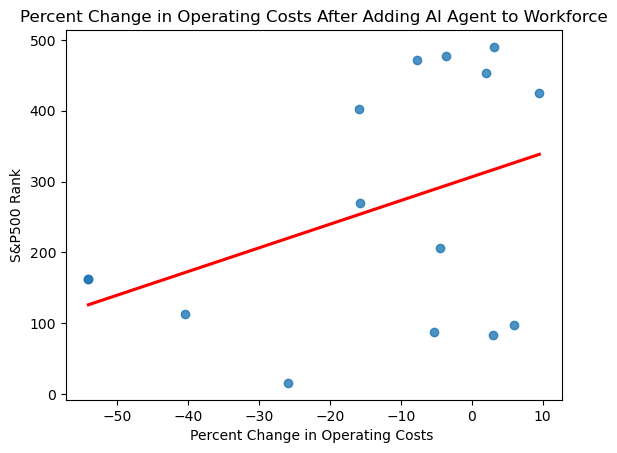

In [276]:
sns.regplot(x=y_values, y=x_values, ci=None, line_kws={"color": "red"})
#plt.xticks([1, 2, 3])
plt.title("Percent Change in Operating Costs After Adding AI Agent to Workforce")
#plt.scatter(y_values, x_values)
plt.xlabel('Percent Change in Operating Costs ')
plt.ylabel('S&P500 Rank')
plt.show()